## Code required to create Figure 2
Entire notebook takes: 41 seconds on Intel i7-10750 using > 4GB RAM

In [1]:
import datetime
import numpy as np
import pandas as pd
import xarray as xr
from statsmodels.tsa.stattools import adfuller ## Augmented Dickey-Fuller test for non-stationarity in time series
from statsmodels.tsa.seasonal import seasonal_decompose

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
START_YEAR = "1980"
END_YEAR = "2022"
SEASONS = ['DJF', 'MAM', 'JJA', 'SON']

In [3]:
METRIC_NAMES = ["Woollings et al. 2010", "Barnes & Polvani 2013", "Barnes & Simpson 2017",\
                        "Grise & Polvani 2017", "Bracegirdle et al. 2018", "Ceppi et al. 2018", "Kerr et al. 2020"]
METRIC_DATA_NAMES = ['Woollings2010_NorthPacific', 'BarnesPolvani2013_NorthPacific', 'BarnesSimpson2017_NorthPacific',\
                     'GrisePolvani2017_NorthPacific', 'Bracegirdle2018_NorthPacific', 'Ceppi2018_NorthPacific',\
                     'Kerr2020_NorthPacific']

In [4]:
METRIC_LABEL_RENAMER = dict(zip(METRIC_DATA_NAMES, METRIC_NAMES))

## Load Reanalysis

In [5]:
era_npac_day_dict = {}

era_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['GrisePolvani2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
era_npac_day_dict['Ceppi2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Ceppi et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
era_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_ERA5_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [6]:
jra55_npac_day_dict = {}

jra55_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['GrisePolvani2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
jra55_npac_day_dict['Ceppi2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Ceppi et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
jra55_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_JRA55_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [7]:
merra2_npac_day_dict = {}

merra2_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['GrisePolvani2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
merra2_npac_day_dict['Ceppi2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Ceppi et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
merra2_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_MERRA2_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


In [8]:
ncepdoe2_npac_day_dict = {}

ncepdoe2_npac_day_dict['Woollings2010_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Woollings et al. 2010 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['BarnesPolvani2013_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Barnes & Polvani 2013 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['BarnesPolvani2015_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Barnes & Polvani 2015 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['BarnesSimpson2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Barnes & Simpson 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['GrisePolvani2017_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Grise & Polvani 2017 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['Bracegirdle2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Bracegirdle et al. 2018 North Pacific.csv', index_col='year')
ncepdoe2_npac_day_dict['Ceppi2018_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Ceppi et al. 2018 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]
ncepdoe2_npac_day_dict['Kerr2020_NorthPacific'] = pd.read_csv('reanalysis_jet_latitude_data/NPAC_only_NCEPDOE2_daily_outputs/Kerr et al. 2020 North Pacific.csv', index_col='time')[START_YEAR: END_YEAR]


# Make Figure 2

In [9]:
### required functions for calculating gradient/trend
def get_linear_reg_slope(data, col_name):
    lin_reg_data = prepare_data_for_linear_reg(data, col_name)
    return linear_reg_slope(lin_reg_data)


def prepare_data_for_linear_reg(data, col_name):
    values = data[col_name].values.astype(float)
    ordinal_dates = get_ordinal_dates(data)
    lin_reg_data = pd.DataFrame([values, ordinal_dates]).T
    lin_reg_data = lin_reg_data.dropna()
    return lin_reg_data


def get_ordinal_dates(data, index_col_name='time'):
    return pd.to_datetime(data.reset_index()[index_col_name]).apply(lambda date: date.toordinal())


def linear_reg_slope(data):
    """
        data[0] should be values, data[1] should be ordinal dates
    """
    slope, intercept = np.polyfit(data[1], data[0], 1)
    lr1d = np.poly1d([slope, intercept])(data[1])
    return pd.DataFrame(lr1d, index=data[1].apply(lambda row: pd.to_datetime(datetime.date.fromordinal(int(row)))), columns=['reg_line'])

def get_year_gradient_of_trend(data, jet_lat_name='jet_lat', proportion_threshold_for_missing_data=4):
    """
        TODO: fix ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None
    """
    try:
        cdata = data.dropna()
        lin_reg_line = get_linear_reg_slope(data, jet_lat_name)
        year_gradient = (lin_reg_line['reg_line'][-1] - lin_reg_line['reg_line'][0]) / (lin_reg_line.index.year[-1]  - lin_reg_line.index.year[0])
        return year_gradient
    except ValueError as ve:
        print(ve)
        pass
    try:
        assert float(data.isnull().sum(axis=0)) < (len(data)/proportion_threshold_for_missing_data)
        data = data.fillna(data.mean())
        lin_reg_line = get_linear_reg_slope(data, jet_lat_name)
        year_gradient = (lin_reg_line['reg_line'][-1] - lin_reg_line['reg_line'][0]) / (lin_reg_line.index.year[-1]  - lin_reg_line.index.year[0])
        return year_gradient
    except AssertionError as ae:
        print(f"{data.name}failed. {int(data.isnull().sum(axis=0))} out of {len(data)} data points missing")
        return np.nan

## Get trend and mean by season

In [10]:
reanalysis_data = [era_npac_day_dict, jra55_npac_day_dict, merra2_npac_day_dict, ncepdoe2_npac_day_dict]
reanalysis_names = ["ERA-5", "JRA-55", "MERRA-2", "NCEP/DOE II"]
djf_jet_lat_mean_dict = {}
mam_jet_lat_mean_dict = {}
jja_jet_lat_mean_dict = {}
son_jet_lat_mean_dict = {}
djf_jet_lat_trend_dict = {}
mam_jet_lat_trend_dict = {}
jja_jet_lat_trend_dict = {}
son_jet_lat_trend_dict = {}
for ind, reanalysis_set in enumerate(reanalysis_data):
    reanalysis_name = reanalysis_names[ind]
    djf_jet_lat_mean_dict[reanalysis_name] = {}
    mam_jet_lat_mean_dict[reanalysis_name] = {}
    jja_jet_lat_mean_dict[reanalysis_name] = {}
    son_jet_lat_mean_dict[reanalysis_name] = {}
    djf_jet_lat_trend_dict[reanalysis_name] = {}
    mam_jet_lat_trend_dict[reanalysis_name] = {}
    jja_jet_lat_trend_dict[reanalysis_name] = {}
    son_jet_lat_trend_dict[reanalysis_name] = {}
    print(reanalysis_name)
    for metric in METRIC_DATA_NAMES:
        if metric == "Bracegirdle2018_NorthPacific":
            ## ignore because only calculated by annual scale
            continue
        else:
            reanalysis_set[metric].index = pd.to_datetime(reanalysis_set[metric].index)
            djf_jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([12, 1, 2])]['jet_lat'].mean())
            mam_jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([3, 4, 5])]['jet_lat'].mean())
            jja_jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([6, 7, 8])]['jet_lat'].mean())
            son_jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([9, 10, 11])]['jet_lat'].mean())
   
            djf_jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([12, 1, 2])])
            mam_jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([3, 4, 5])])
            jja_jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([6, 7, 8])])
            son_jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric][reanalysis_set[metric].index.month.isin([9, 10, 11])])

ERA-5
JRA-55
MERRA-2
NCEP/DOE II


In [11]:
def format_dict_to_dataframe(jet_lat_dict, unique_col_name):
    jet_lat_df = pd.DataFrame(jet_lat_dict)
    jet_lat_df = jet_lat_df.stack().reset_index()
    jet_lat_df.columns = ["Metric", "Dataset", unique_col_name]
    ## rename metric name to formatted version
    jet_lat_df['Metric'] = jet_lat_df.Metric.apply(lambda row: METRIC_LABEL_RENAMER[row])
    ## include decade trend 
    if 'trend' in unique_col_name.lower():
        jet_lat_df[unique_col_name+'_decade'] = jet_lat_df[unique_col_name]*10
    return jet_lat_df

In [12]:
djf_jet_lat_mean_df = format_dict_to_dataframe(djf_jet_lat_mean_dict, "DJF Mean")
djf_jet_lat_trend_df = format_dict_to_dataframe(djf_jet_lat_trend_dict, "DJF Trend")

mam_jet_lat_mean_df = format_dict_to_dataframe(mam_jet_lat_mean_dict, "MAM Mean")
mam_jet_lat_trend_df = format_dict_to_dataframe(mam_jet_lat_trend_dict, "MAM Trend")

jja_jet_lat_mean_df = format_dict_to_dataframe(jja_jet_lat_mean_dict, "JJA Mean")
jja_jet_lat_trend_df = format_dict_to_dataframe(jja_jet_lat_trend_dict, "JJA Trend")

son_jet_lat_mean_df = format_dict_to_dataframe(son_jet_lat_mean_dict, "SON Mean")
son_jet_lat_trend_df = format_dict_to_dataframe(son_jet_lat_trend_dict, "SON Trend")

In [13]:
## merge all
allseasons_jet_lat_mean_df = djf_jet_lat_mean_df.merge(mam_jet_lat_mean_df)
allseasons_jet_lat_mean_df = allseasons_jet_lat_mean_df.merge(jja_jet_lat_mean_df)
allseasons_jet_lat_mean_df = allseasons_jet_lat_mean_df.merge(son_jet_lat_mean_df)

allseasons_jet_lat_trend_df = djf_jet_lat_trend_df.merge(mam_jet_lat_trend_df)
allseasons_jet_lat_trend_df = allseasons_jet_lat_trend_df.merge(jja_jet_lat_trend_df)
allseasons_jet_lat_trend_df = allseasons_jet_lat_trend_df.merge(son_jet_lat_trend_df)

allseasons_jet_lat_mean_and_trend_df = allseasons_jet_lat_mean_df.merge(allseasons_jet_lat_trend_df)

In [14]:
def make_trend_kde_and_scatter_plot(allseason_data, column_to_use, ax, use_legend=False):
    sns.kdeplot(allseason_data[column_to_use], ax=ax, linewidth=6, alpha=.5)
    sns.scatterplot(x=column_to_use, y=[1.1]*6, style='Metric', s=100, data=allseason_data.loc[allseason_data['Dataset'] == 'ERA-5'], ax=ax, legend=False)
    sns.scatterplot(x=column_to_use, y=[0.8]*6, style='Metric', s=100, data=allseason_data.loc[allseason_data['Dataset'] == 'JRA-55'], ax=ax, legend=False)
    sns.scatterplot(x=column_to_use, y=[0.5]*6, style='Metric', s=100, data=allseason_data.loc[allseason_data['Dataset'] == 'MERRA-2'], ax=ax, legend=False)
    sns.scatterplot(x=column_to_use, y=[0.2]*6, style='Metric', s=100, data=allseason_data.loc[allseason_data['Dataset'] == 'NCEP/DOE II'], ax=ax, legend=use_legend)
    ax.set_xlabel(r"Trend ${(\circ N^{-decade})}$", size=16)
    ax.set_ylabel("Density", size=16)

Text(0.7, 0.2, 'NCEP DOE II')

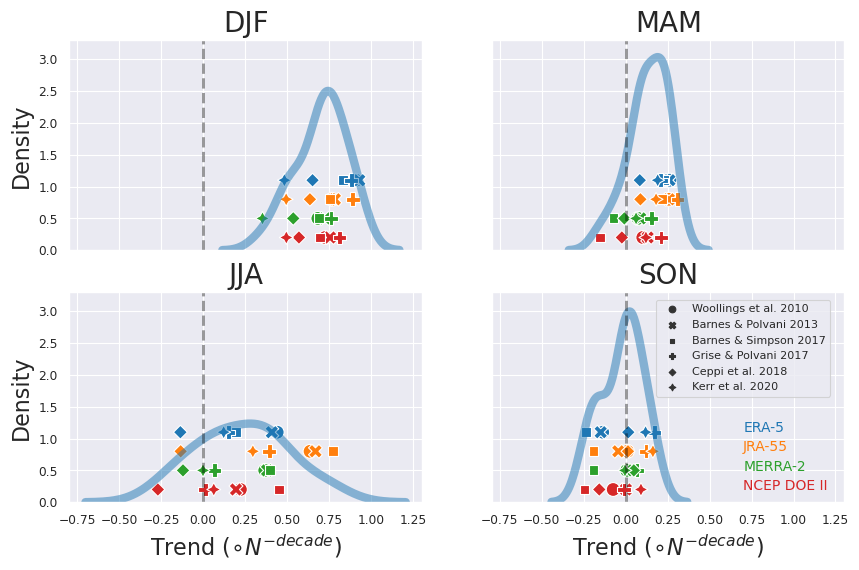

In [15]:
sns.set_style('darkgrid')
sns.set_context('paper')
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
make_trend_kde_and_scatter_plot(allseasons_jet_lat_trend_df, 'DJF Trend_decade', ax=axes[0][0])
make_trend_kde_and_scatter_plot(allseasons_jet_lat_trend_df, 'MAM Trend_decade', ax=axes[0][1])
make_trend_kde_and_scatter_plot(allseasons_jet_lat_trend_df, 'JJA Trend_decade', ax=axes[1][0])
make_trend_kde_and_scatter_plot(allseasons_jet_lat_trend_df, 'SON Trend_decade', ax=axes[1][1], use_legend=True)
season_counter = 0
for ax_row in axes:
    for ax in ax_row:
        ax.vlines(0, 0, 3.3, color='k', linewidth=2, linestyle='--', alpha=.4)
        ax.set_ylim(0, 3.3)
        ax.set_title(SEASONS[season_counter], size=20)
        season_counter+=1

axes[1][1].legend(ncols=1, bbox_to_anchor=[0.45, 0.99], fancybox=True, fontsize=8)
axes[1][1].text(s="ERA-5", x=0.7, y=1.1, color='C0', size=10)
axes[1][1].text(s="JRA-55", x=0.7, y=0.8, color='C1', size=10)
axes[1][1].text(s="MERRA-2", x=0.7, y=0.5, color='C2', size=10)
axes[1][1].text(s="NCEP DOE II", x=0.7, y=0.2, color='C3', size=10)
# fig.suptitle("Trends", size=16)
# fig.savefig('figures/figure_2.png', dpi=300, bbox_inches='tight', transparent=False)

Text(0.5, 1.0, 'DJF Trend')

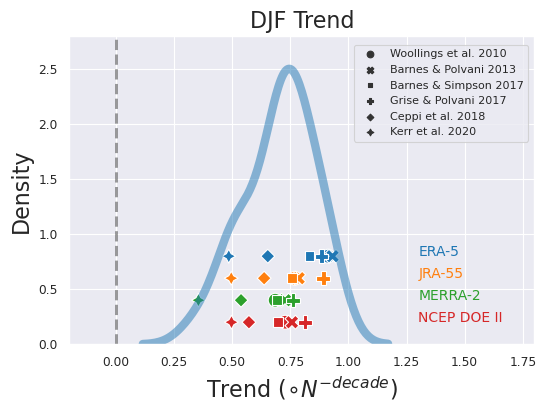

In [16]:
sns.set_style('darkgrid')
sns.set_context('paper')
fig, ax = plt.subplots(1, figsize=(6, 4))
sns.kdeplot(allseasons_jet_lat_trend_df['DJF Trend_decade'], ax=ax, linewidth=6, alpha=.5)
sns.scatterplot(x='DJF Trend_decade', y=[0.8]*6, style='Metric', s=100, data=allseasons_jet_lat_trend_df.loc[allseasons_jet_lat_trend_df['Dataset'] == 'ERA-5'], ax=ax, legend=False)
sns.scatterplot(x='DJF Trend_decade', y=[0.6]*6, style='Metric', s=100, data=allseasons_jet_lat_trend_df.loc[allseasons_jet_lat_trend_df['Dataset'] == 'JRA-55'], ax=ax, legend=False)
sns.scatterplot(x='DJF Trend_decade', y=[0.4]*6, style='Metric', s=100, data=allseasons_jet_lat_trend_df.loc[allseasons_jet_lat_trend_df['Dataset'] == 'MERRA-2'], ax=ax, legend=False)
sns.scatterplot(x='DJF Trend_decade', y=[0.2]*6, style='Metric', s=100, data=allseasons_jet_lat_trend_df.loc[allseasons_jet_lat_trend_df['Dataset'] == 'NCEP/DOE II'], ax=ax, legend=True)
ax.set_xlabel(r"Trend ${(\circ N^{-decade})}$", size=16)
ax.set_ylabel("Density", size=16)
ax.legend(ncols=1, bbox_to_anchor=[0.6, 0.99], fancybox=True, fontsize=8)
ax.set_xlim(-0.2, 1.8)
ax.set_ylim(0, 2.8)
ax.vlines(0, 0, 2.8, color='k', linewidth=2, linestyle='--', alpha=.4)
ax.text(s="ERA-5", x=1.3, y=0.8, color='C0', size=10)
ax.text(s="JRA-55", x=1.3, y=0.6, color='C1', size=10)
ax.text(s="MERRA-2", x=1.3, y=0.4, color='C2', size=10)
ax.text(s="NCEP DOE II", x=1.3, y=0.2, color='C3', size=10)
ax.set_title("DJF Trend", size=16)
# fig.savefig('figures/figure_2_DJF_only.png', dpi=300, bbox_inches='tight', transparent=False)

## alternative plot

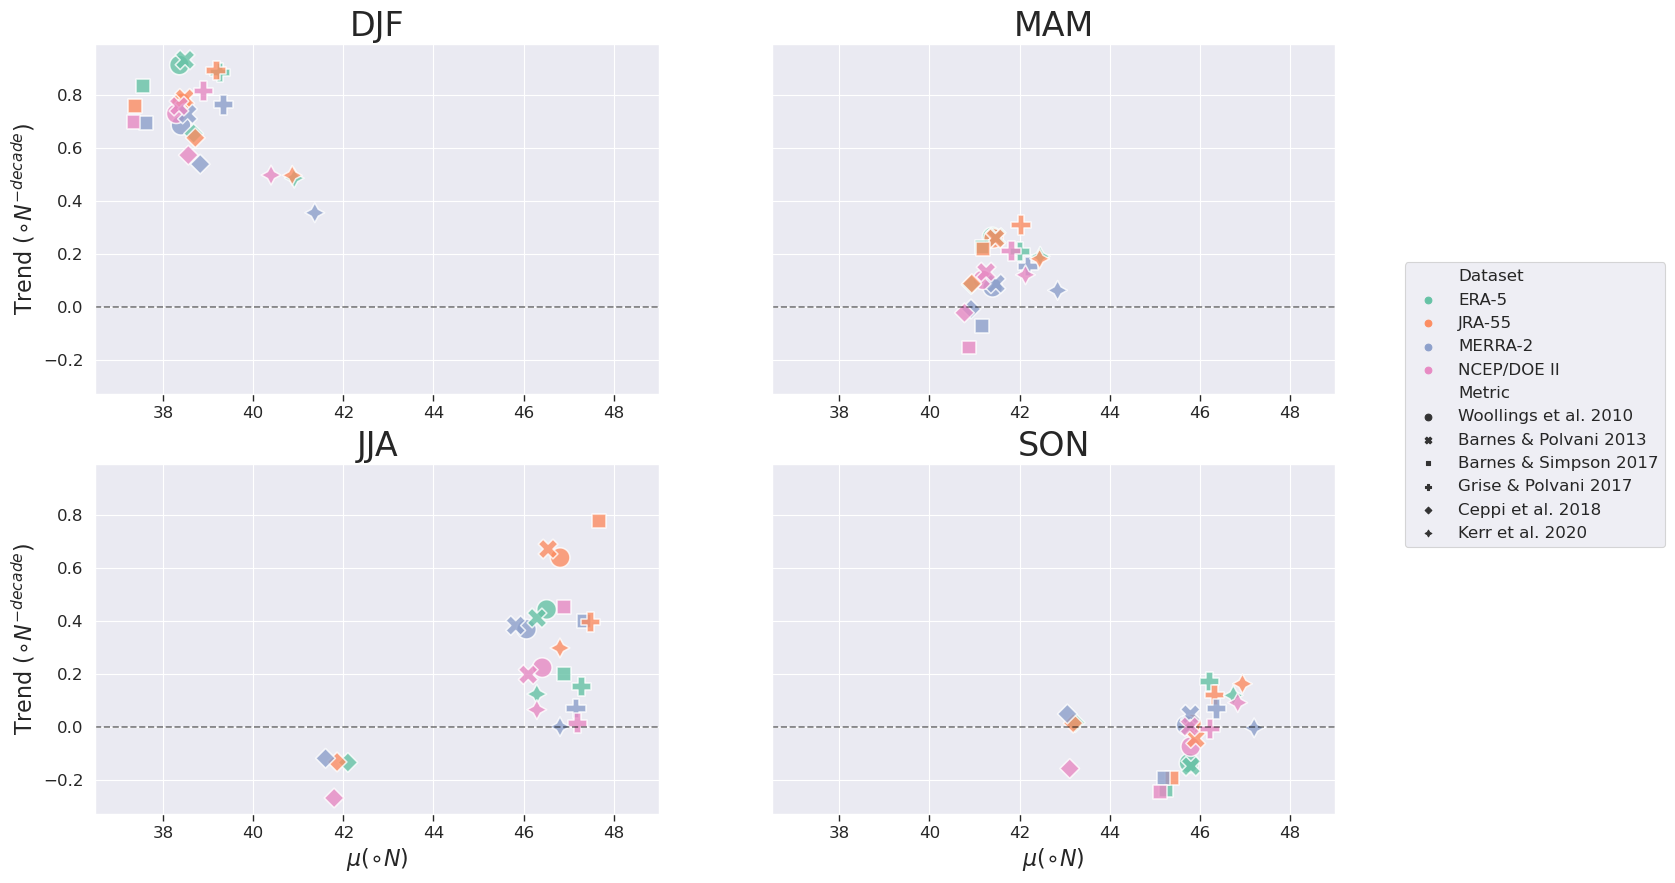

In [17]:
sns.set_style('darkgrid')
sns.set_context('paper')
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)
sns.scatterplot(x="DJF Mean", y="DJF Trend_decade", data=allseasons_jet_lat_mean_and_trend_df,\
                hue="Dataset", style="Metric", legend=False,
                ax=axes[0][0], s=200, alpha=.8, palette='Set2')
sns.scatterplot(x="MAM Mean", y="MAM Trend_decade", data=allseasons_jet_lat_mean_and_trend_df,\
                hue="Dataset", style="Metric", legend=False,
                ax=axes[0][1], s=200, alpha=.8, palette='Set2')
sns.scatterplot(x="JJA Mean", y="JJA Trend_decade", data=allseasons_jet_lat_mean_and_trend_df,\
                hue="Dataset", style="Metric", legend=False,
                ax=axes[1][0], s=200, alpha=.8, palette='Set2')
sns.scatterplot(x="SON Mean", y="SON Trend_decade", data=allseasons_jet_lat_mean_and_trend_df,\
                hue="Dataset", style="Metric", legend=True,
                ax=axes[1][1], s=200, alpha=.8, palette='Set2')

axes[0][0].set_ylabel("Trend ${(\circ N^{-decade})}$", size=16)
axes[0][0].set_title('DJF', size=24)
axes[0][1].set_ylabel("Trend ${(\circ N^{-decade})}$", size=16)
axes[0][1].set_title('MAM', size=24)
axes[1][0].set_ylabel("Trend ${(\circ N^{-decade})}$", size=16)
axes[1][0].set_title('JJA', size=24)
axes[1][1].set_ylabel("Trend ${(\circ N^{-decade})}$", size=16)
axes[1][1].set_title('SON', size=24)
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel("${\mu (\circ N)}$", size=16)
        ax.tick_params(axis='both', which='major', labelsize=12, labelbottom = True, bottom=True, top = False, labeltop=False)
        # ax.set_ylim(-0.5, 0.8)
        ax.hlines(0, 36.5, 49, ls='--', color='k', alpha=.5)
        ax.set_xlim(36.5, 49)
axes[1][1].legend(ncols=1, bbox_to_anchor=[1.6, 1.6], fontsize=12)
# plt.suptitle("North Pacific Jet Latitude", size=17)

fig.subplots_adjust(wspace=.2)
# plt.savefig("figures/npac_jet_3xdiagnostic_metric_dataset_scatter_season_compare.png", bbox_inches='tight')

# Annually

In [18]:
reanalysis_data = [era_npac_day_dict, jra55_npac_day_dict, merra2_npac_day_dict, ncepdoe2_npac_day_dict]
reanalysis_names = ["ERA-5", "JRA-55", "MERRA-2", "NCEP/DOE II"]
jet_lat_mean_dict = {}
jet_lat_std_dict = {}
jet_lat_std_err_dict = {}
jet_lat_trend_dict = {}
for ind, reanalysis_set in enumerate(reanalysis_data):
    reanalysis_name = reanalysis_names[ind]
    jet_lat_mean_dict[reanalysis_name] = {}
    jet_lat_std_dict[reanalysis_name] = {}
    jet_lat_std_err_dict[reanalysis_name] = {}
    jet_lat_trend_dict[reanalysis_name] = {}
    print(reanalysis_name)
    for metric in METRIC_DATA_NAMES:
        if metric == "Bracegirdle2018_NorthPacific":
            jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['annual_JPOS'].mean())
            jet_lat_std_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['annual_JPOS'].std())
            jet_lat_std_err_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['annual_JPOS'].std()) / np.sqrt(len(reanalysis_set[metric]['annual_JPOS']))
            b18_data = reanalysis_set[metric]['annual_JPOS']
            b18_data.index = pd.date_range(start=START_YEAR, freq="y", periods=len(b18_data))
            b18_data.index = b18_data.index.rename('time')
            jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(pd.DataFrame(b18_data), jet_lat_name='annual_JPOS')
            continue
        # if metric == "Kerr2020_NorthPacific":
        #     jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['jet_lat'].mean())
        #     jet_lat_std_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['jet_lat'].mean('lon').std())
        #     jet_lat_std_err_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['jet_lat'].mean('lon').std()) / np.sqrt(len(reanalysis_set[metric]['jet_lat']))
        #     jet_lat_trend_dict[reanalysis_name][metric] = get_seasonally_decomposed_year_gradient_of_trend(reanalysis_set[metric]['jet_lat'].mean('lon').to_dataframe())
        else:
            reanalysis_set[metric].index = pd.to_datetime(reanalysis_set[metric].index)
            jet_lat_mean_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['jet_lat'].mean())
            jet_lat_std_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['jet_lat'].std())
            jet_lat_std_err_dict[reanalysis_name][metric] = float(reanalysis_set[metric]['jet_lat'].std()) / np.sqrt(len(reanalysis_set[metric]['jet_lat']))
            jet_lat_trend_dict[reanalysis_name][metric] = get_year_gradient_of_trend(reanalysis_set[metric])        
        
        

ERA-5
JRA-55
MERRA-2
NCEP/DOE II


In [19]:
jet_lat_mean_df = pd.DataFrame(jet_lat_mean_dict)
jet_lat_std_df = pd.DataFrame(jet_lat_std_dict)
jet_lat_std_err_df = pd.DataFrame(jet_lat_std_err_dict)
jet_lat_trend_df = pd.DataFrame(jet_lat_trend_dict)

jet_lat_mean_df = jet_lat_mean_df.stack().reset_index()
jet_lat_std_df = jet_lat_std_df.stack().reset_index()
jet_lat_std_err_df = jet_lat_std_err_df.stack().reset_index()
jet_lat_trend_df = jet_lat_trend_df.stack().reset_index()

jet_lat_mean_df.columns = ["Metric", "Dataset", "Mean"]
jet_lat_std_df.columns = ["Metric", "Dataset", "Standard Deviation"]
jet_lat_std_err_df.columns = ["Metric", "Dataset", "Standard Error"]
jet_lat_trend_df.columns = ["Metric", "Dataset", "Trend"]

In [20]:
jet_lat_mean_std_df = jet_lat_mean_df.merge(jet_lat_std_df, on=["Metric", "Dataset"])
jet_lat_mean_std_err_df = jet_lat_mean_std_df.merge(jet_lat_std_err_df, on=["Metric", "Dataset"])
jet_lat_diagnostics_df = jet_lat_mean_std_err_df.merge(jet_lat_trend_df, on=["Metric", "Dataset"])

In [21]:
jet_lat_diagnostics_df['Metric'] = jet_lat_diagnostics_df.Metric.apply(lambda row: METRIC_LABEL_RENAMER[row])

In [22]:
jet_lat_diagnostics_df

,Metric,Dataset,Mean,Standard Deviation,Standard Error,Trend
0,Woollings et al. 2010,ERA-5,43.020207,8.677489,0.070060,0.040365
1,Woollings et al. 2010,JRA-55,43.137982,8.958211,0.072326,0.043837
2,Woollings et al. 2010,MERRA-2,42.881350,8.996748,0.073000,0.025712
3,Woollings et al. 2010,NCEP/DOE II,42.945297,8.693549,0.070189,0.026075
4,Barnes & Polvani 2013,ERA-5,43.029626,8.655016,0.069878,0.039607
5,Barnes & Polvani 2013,JRA-55,43.118351,8.988798,0.072573,0.044228
6,Barnes & Polvani 2013,MERRA-2,42.896907,9.018047,0.073173,0.029205
7,Barnes & Polvani 2013,NCEP/DOE II,42.891839,8.626040,0.069644,0.029265
8,Barnes & Simpson 2017,ERA-5,42.732248,7.563075,0.193039,0.028705
9,Barnes & Simpson 2017,JRA-55,42.914495,7.921925,0.202198,0.042533


Text(0.5, 1.0, 'North Pacific Jet Latitude')

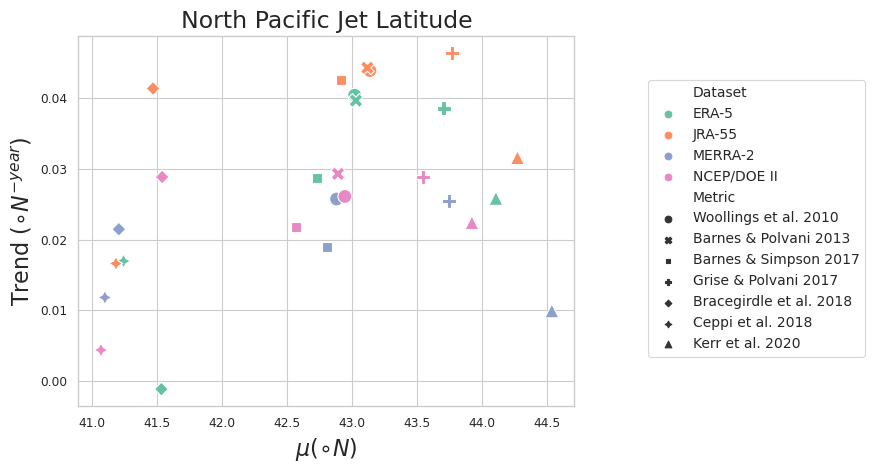

In [23]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1)
sns.scatterplot(x="Mean", y="Trend", data=jet_lat_diagnostics_df,\
                hue="Dataset", style="Metric", 
                ax=ax, s=100, alpha=1, palette='Set2')
ax.legend(ncols=1, bbox_to_anchor=[1.6, 0.9], fontsize=10)
ax.set_xlabel("${\mu (\circ N)}$", size=16); ax.set_ylabel("Trend (${\circ N}^{-year}$)", size=16)
ax.set_title("North Pacific Jet Latitude", size=17)
# plt.savefig("figures/npac_jet_meanvsgradient_metric_dataset_scatter.png", bbox_inches='tight')

In [24]:
jet_lat_trend_pivot_df = jet_lat_diagnostics_df.pivot(index='Metric', columns='Dataset', values='Trend')
jet_lat_std_pivot_df = jet_lat_diagnostics_df.pivot(index='Metric', columns='Dataset', values='Standard Deviation')
jet_lat_mean_pivot_df = jet_lat_diagnostics_df.pivot(index='Metric', columns='Dataset', values='Mean')

In [25]:
jet_lat_trend_pivot_df = jet_lat_trend_pivot_df.sort_index(key=lambda x: x.str[-4:])
jet_lat_std_pivot_df = jet_lat_std_pivot_df.sort_index(key=lambda x: x.str[-4:])
jet_lat_mean_pivot_df = jet_lat_mean_pivot_df.sort_index(key=lambda x: x.str[-4:])

In [26]:
jet_lat_trend_pivot_df

Dataset,ERA-5,JRA-55,MERRA-2,NCEP/DOE II
Metric,,,,
Woollings et al. 2010,0.040365,0.043837,0.025712,0.026075
Barnes & Polvani 2013,0.039607,0.044228,0.029205,0.029265
Barnes & Simpson 2017,0.028705,0.042533,0.018926,0.021790
Grise & Polvani 2017,0.038501,0.046306,0.025447,0.028830
Bracegirdle et al. 2018,-0.001115,0.041313,0.021450,0.028823
Ceppi et al. 2018,0.016960,0.016614,0.011816,0.004399
Kerr et al. 2020,0.025803,0.031546,0.009926,0.022368


In [27]:
jet_lat_std_pivot_df

Dataset,ERA-5,JRA-55,MERRA-2,NCEP/DOE II
Metric,,,,
Woollings et al. 2010,8.677489,8.958211,8.996748,8.693549
Barnes & Polvani 2013,8.655016,8.988798,9.018047,8.626040
Barnes & Simpson 2017,7.563075,7.921925,7.951677,7.605928
Grise & Polvani 2017,9.095139,9.297786,9.442443,9.129642
Bracegirdle et al. 2018,1.585093,1.662804,1.680967,1.308310
Ceppi et al. 2018,4.167004,4.150510,4.073955,4.180824
Kerr et al. 2020,4.967202,5.114124,5.032465,5.358849


In [28]:
jet_lat_mean_pivot_df

Dataset,ERA-5,JRA-55,MERRA-2,NCEP/DOE II
Metric,,,,
Woollings et al. 2010,43.020207,43.137982,42.881350,42.945297
Barnes & Polvani 2013,43.029626,43.118351,42.896907,42.891839
Barnes & Simpson 2017,42.732248,42.914495,42.810447,42.571661
Grise & Polvani 2017,43.706205,43.770276,43.745655,43.546503
Bracegirdle et al. 2018,41.533203,41.468750,41.205814,41.538953
Ceppi et al. 2018,41.241894,41.183014,41.098140,41.067998
Kerr et al. 2020,44.107600,44.273243,44.538068,43.922994


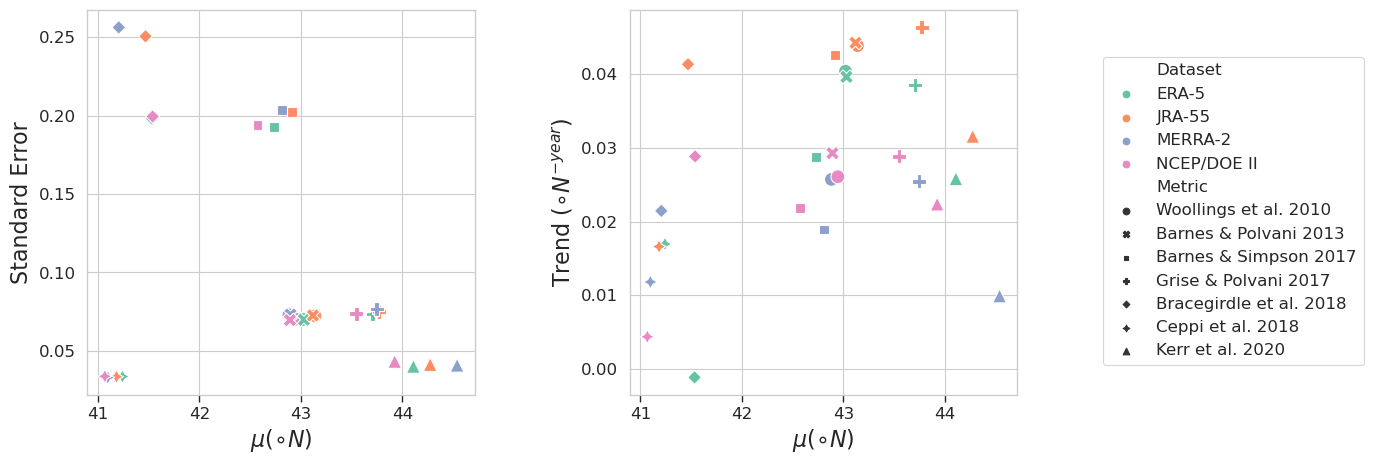

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
sns.scatterplot(x="Mean", y="Standard Error", data=jet_lat_diagnostics_df,\
                hue="Dataset", style="Metric", legend=False,
                ax=axes[0], s=100, alpha=1, palette='Set2')
sns.scatterplot(x="Mean", y="Trend", data=jet_lat_diagnostics_df,\
                hue="Dataset", style="Metric",
                ax=axes[1], s=100, alpha=1, palette='Set2')

axes[0].set_ylabel("Standard Error", size=16)
axes[1].set_ylabel("Trend ${(\circ N^{-year})}$", size=16)

for ax in axes:
    ax.set_xlabel("${\mu (\circ N)}$", size=16)
    ax.tick_params(axis='both', which='major', labelsize=12, labelbottom = True, bottom=True, top = False, labeltop=False)
axes[1].legend(ncols=1, bbox_to_anchor=[1.2, 0.9], fontsize=12)
# plt.suptitle("North Pacific Jet Latitude", size=17)

fig.subplots_adjust(wspace=.4)


In [30]:
jet_lat_diagnostics_df['Trend_decade'] = jet_lat_diagnostics_df['Trend']*10

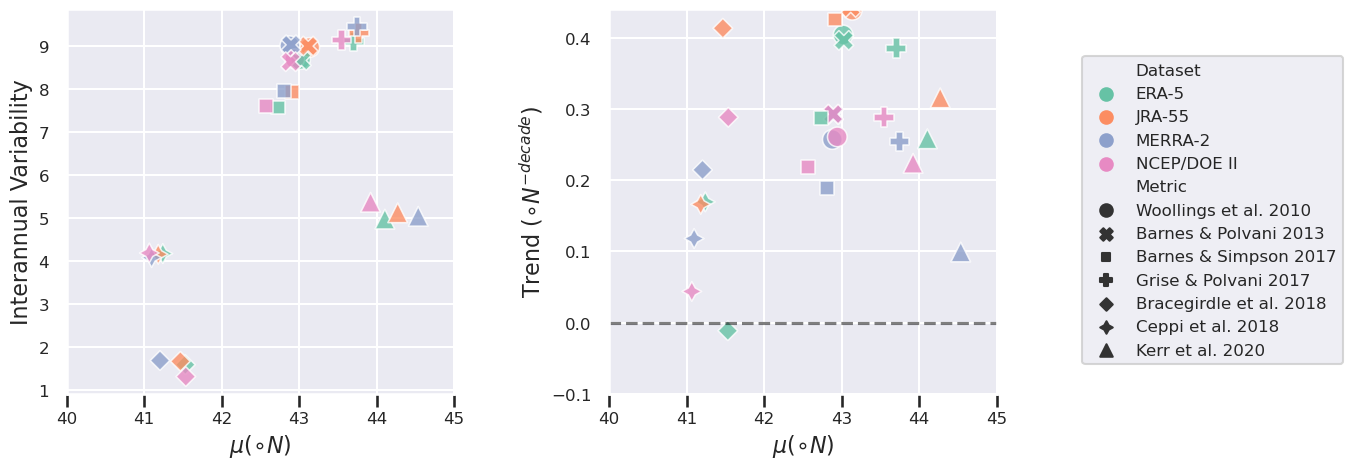

In [31]:
sns.set_style('darkgrid')
sns.set_context('talk')
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
sns.scatterplot(x="Mean", y="Standard Deviation", data=jet_lat_diagnostics_df,\
                hue="Dataset", style="Metric", legend=False,
                ax=axes[0], s=200, alpha=.8, palette='Set2')
sns.scatterplot(x="Mean", y="Trend_decade", data=jet_lat_diagnostics_df,\
                hue="Dataset", style="Metric",
                ax=axes[1], s=200, alpha=.8, palette='Set2')

axes[0].set_ylabel("Interannual Variability", size=16)
axes[1].set_ylabel("Trend ${(\circ N^{-decade})}$", size=16)
axes[1].hlines(0, 40, 45, ls='--', color='k', alpha=.5)
axes[1].set_xlim(40, 45)
axes[1].set_ylim(-0.1, 0.44)
for ax in axes:
    ax.set_xlabel("${\mu (\circ N)}$", size=16)
    ax.tick_params(axis='both', which='major', labelsize=12, labelbottom = True, bottom=True, top = False, labeltop=False)
axes[1].legend(ncols=1, bbox_to_anchor=[1.2, 0.9], fontsize=12)
# plt.suptitle("North Pacific Jet Latitude", size=17)

fig.subplots_adjust(wspace=.4)